<a href="https://colab.research.google.com/github/tony-sj/SJ-DeepLearning_practice/blob/main/1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [ ]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device)

Current cuda device is cuda


In [ ]:
batch_size = 50
epoch_num = 15
learning_rate = 0.0001

In [ ]:
train_data = datasets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

print('number of training data', len(train_data))
print('number of test data', len(test_data))

number of training data 60000
number of test data 10000


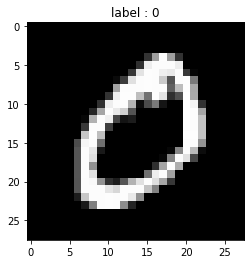

In [ ]:
image, label = train_data[1]

plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title('label : %s' % label)
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3, 1)
    self.conv2 = nn.Conv2d(32, 64, 3 ,1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 10)
  
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    output = F.log_softmax(x, dim = 1)
    return output

In [ ]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
model.train()
i = 0
for epoch in range(epoch_num):
  for data, target in train_loader:
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
      print('Train Step: {}\tLoss: {:.3f}'.format(i, loss.item()))
    i += 1
print('Train done')

Train Step: 0	Loss: 2.294
Train Step: 1000	Loss: 0.256
Train Step: 2000	Loss: 0.156
Train Step: 3000	Loss: 0.252
Train Step: 4000	Loss: 0.130
Train Step: 5000	Loss: 0.081
Train Step: 6000	Loss: 0.080
Train Step: 7000	Loss: 0.090
Train Step: 8000	Loss: 0.207
Train Step: 9000	Loss: 0.097
Train Step: 10000	Loss: 0.072
Train Step: 11000	Loss: 0.026
Train Step: 12000	Loss: 0.035
Train Step: 13000	Loss: 0.057
Train Step: 14000	Loss: 0.016
Train Step: 15000	Loss: 0.002
Train Step: 16000	Loss: 0.054
Train Step: 17000	Loss: 0.012
Train done


In [ ]:
# 모델 평가
model.eval()
correct = 0
for data, target in test_loader:
  data = data.to(device)
  target = target.to(device)
  output = model(data)
  prediction = output.data.max(1)[1]
  correct += prediction.eq(target.data).sum()

print('Test set: Accuracy: {:.2f}%'.format(100 * correct / len(test_loader.dataset)))

Test set: Accuracy: 98.96%
